# RTT by TTL

## Data preparation

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import Cdf
import Pmf


# define global plot parameters
params = {'axes.labelsize' : 12, 'axes.titlesize' : 12,
          'font.size' : 12, 'legend.fontsize' : 12,
          'xtick.labelsize' : 12, 'ytick.labelsize' : 12}
plt.rcParams.update(params)
plt.rcParams.update({'figure.max_open_warning': 0})

# connect to database and get data
conn = sqlite3.connect('data/youtube-traceroute.db')

# read necessary tables from database
date_cols = ['dtime']
df = pd.read_sql_query('select * from traceroute where status = "COMPLETED"', conn, parse_dates = date_cols)
msmpoint = pd.read_sql_query('select * from msmpoint', conn)
endpoint_asn_df = pd.read_sql_query('select * from endpoint_asn_mapping', conn)
conn.close()

# types of ASes, based on CAIDA classification
# downloaded from here:     https://www.caida.org/data/as-classification/
as_types = pd.read_csv('metadata/as_types.txt', sep = '|', skiprows = range(6), names = ['as', 'src', 'type'])

# cast RTT column to float just to make sure
df['rtt'] = df['rtt'].astype('float')

# differentiate between v4 and v6
df_v6 = df[df['source'].str.contains(':')].copy()
df_v4 = df[~df['source'].str.contains(':')].copy()

In [2]:
len(df_v4)

3740129

In [3]:
len(df_v6)

3034392

## Include AS types

In [4]:
types = endpoint_asn_df.merge(as_types, left_on = 'asn', right_on = 'as', how = 'left')
types[types['endpoint'].duplicated(keep = False)]  # find duplicates, i.e. endpoints that were announced by multiple ASes

,endpoint,asn,holder,as,src,type
240,212.49.128.229,12541,"BTESPANA - BT ESPANA, COMPANIA DE SERVICIOS GL...",12541.0,CAIDA_class,Transit/Access
241,212.49.128.229,8903,"AS8903 - BT ESPANA, COMPANIA DE SERVICIOS GLOB...",8903.0,peerDB_class,Content
242,212.49.129.78,12541,"BTESPANA - BT ESPANA, COMPANIA DE SERVICIOS GL...",12541.0,CAIDA_class,Transit/Access
243,212.49.129.78,8903,"AS8903 - BT ESPANA, COMPANIA DE SERVICIOS GLOB...",8903.0,peerDB_class,Content
244,212.49.129.5,12541,"BTESPANA - BT ESPANA, COMPANIA DE SERVICIOS GL...",12541.0,CAIDA_class,Transit/Access
245,212.49.129.5,8903,"AS8903 - BT ESPANA, COMPANIA DE SERVICIOS GLOB...",8903.0,peerDB_class,Content
739,2001:428:0:1:205:171:253:81,209,CENTURYLINK-US-LEGACY-QWEST - Qwest Communicat...,209.0,peerDB_class,Transit/Access
740,2001:428:0:1:205:171:253:81,3908,CENTURYLINK-ASIA-LEGACY-QWEST - Qwest Communic...,3908.0,CAIDA_class,Transit/Access
741,2001:428:0:1:205:171:253:81,3910,CENTURYLINK-EUROPE-LEGACY-QWEST - Qwest Commun...,3910.0,CAIDA_class,Transit/Access
742,2001:428::205:171:202:212,209,CENTURYLINK-US-LEGACY-QWEST - Qwest Communicat...,209.0,peerDB_class,Transit/Access


In [5]:
types['type'].value_counts()

Content           26784
Transit/Access     8890
Enterprise           49
Name: type, dtype: int64

In [6]:
types[types['type'].isnull()]

,endpoint,asn,holder,as,src,type
340,80.249.208.247,1200,AMS-IX1 - Amsterdam Internet Exchange B.V.,NaN,NaN,NaN
348,2001:7f8:1::a501:5169:1,1200,AMS-IX1 - Amsterdam Internet Exchange B.V.,NaN,NaN,NaN
402,192.71.21.225,43065,AS_INTERLAN_SE - Interlan Networks AB,NaN,NaN,NaN
410,2001:67c:2448:8::1,43065,AS_INTERLAN_SE - Interlan Networks AB,NaN,NaN,NaN
1885,80.249.209.100,1200,AMS-IX1 - Amsterdam Internet Exchange B.V.,NaN,NaN,NaN
4632,62.95.54.122,3246,TDCSONG - Tele2 Sverige AB,NaN,NaN,NaN
4633,88.131.152.10,3246,TDCSONG - Tele2 Sverige AB,NaN,NaN,NaN
4637,2001:6f0:40::3a,3246,TDCSONG - Tele2 Sverige AB,NaN,NaN,NaN
4638,2001:6f0:81:100::6:2,3246,TDCSONG - Tele2 Sverige AB,NaN,NaN,NaN
10792,2001:798:14:10aa::d,21320,GEANT_IAS_VRF - GEANT Limited,NaN,NaN,NaN


#### --> Most NaNs are duplicates, drop all of them
#### --> for other duplicates, keep the ones that were officially looked up using peerDB_class, drop all CAIDA_class ones

### Note: have to drop manually here

In [7]:
# drop manually
types.drop([240, 242, 244, 740, 741, 743, 744, 746, 747, 8327, 8328, 8330, 8331], inplace = True, axis = 'rows')
types.dropna(inplace = True)

# validate if it worked
types[types['endpoint'].duplicated(keep = False)]

,endpoint,asn,holder,as,src,type
24254,218.100.52.3,10026,PACNET Pacnet Global Ltd,10026.0,peerDB_class,Transit/Access
24255,218.100.52.3,4637,ASN-TELSTRA-GLOBAL Telstra Global,4637.0,peerDB_class,Transit/Access
28157,218.100.52.151,10026,PACNET Pacnet Global Ltd,10026.0,peerDB_class,Transit/Access
28158,218.100.52.151,4637,ASN-TELSTRA-GLOBAL Telstra Global,4637.0,peerDB_class,Transit/Access


#### For remaining duplicates, simply pick one representative AS for each IP address. In this case, drop AS10026.

In [8]:
types.drop([24254, 28157], inplace = True, axis = 'rows')  # drop manually 

In [9]:
# validate if it worked
types[types['endpoint'].duplicated(keep = False)]

,endpoint,asn,holder,as,src,type


#### No duplicates left, cleanup columns to prepare merging

In [10]:
types.dtypes

endpoint     object
asn           int64
holder       object
as          float64
src          object
type         object
dtype: object

In [11]:
types = types[['endpoint', 'asn', 'holder', 'type']]  # only pick necessary columns

#### Merge Classification with traceroute data

In [12]:
# join on IP to assign ASNs
# no left outer join here, since we only want endpoints that have been classified

df_v6 = df_v6.merge(types, on = 'endpoint')
df_v4 = df_v4.merge(types, on = 'endpoint')

print(len(df_v4))
print(len(df_v6))

3142044
2922411


In [13]:
# put all measurements from one type into a tuple of (type, v6, v4)
by_as_type_v6 = dict(list(df_v6.groupby(['type'])))
by_as_type_v4 = dict(list(df_v4.groupby(['type'])))

classes = [('Content', by_as_type_v4['Content'], by_as_type_v6['Content']),
           ('Transit/Access', by_as_type_v4['Transit/Access'], by_as_type_v6['Transit/Access']),
           ('Enterprise', by_as_type_v4['Enterprise'], by_as_type_v6['Enterprise'])
          ]

## Restrict to residential probes

In [14]:
# load metadata of probes, somewhat tricky since formatting of input file is sub-optimal
probes_metadata = pd.read_csv('metadata/probes_metadata.txt', engine = 'python', sep = '|', skiprows = 3, skipfooter = 1, names = ['probe', 'since', 'hardware', 'asnv4', 'asnv6', 'location', 'type', 'test'])
probes_metadata = probes_metadata[['probe', 'since', 'hardware', 'asnv4', 'asnv6', 'location', 'type']].reset_index().drop('index', 1)

# replace probe number with name to merge with table 'msmpoint' to get skunitid
# strip whitespace from beginning and end of string
probes_metadata['probe'] = probes_metadata['probe'].str.replace('#', 'samsbox').str.strip()

probes = pd.merge(probes_metadata, msmpoint, left_on = 'probe', right_on = 'name')

In [15]:
probes

,probe,since,hardware_x,asnv4,asnv6,location,type,skunitid,msmid,mac,name,hardware_y
0,samsbox01,"2013, Mar 12",WR741NDv4,AS680,AS680,Bremen,NREN,62712,28f784568afa11e2b54500e08147c934,-,samsbox01,WR741NDv4
1,samsbox02,"2017, Jan 18",WR741NDv4,AS8767,AS8767,Munich,RESIDENTIAL,123256,bdf8bc9a8af611e2a74900e08147c934,-,samsbox02,WR741NDv4
2,samsbox03,"2013, Mar 12",WR741NDv4,AS24956,AS24956,Braunschweig,BUSINESS,148644,635cd9468afc11e2901a00e08147c934,-,samsbox03,WR741NDv4
3,samsbox04,"2016, Jan 12",WR741NDv4,AS3320,AS3320,Oldenburg,RESIDENTIAL,148650,915c1bf6b4a311e2a0d300e08147c934,-,samsbox04,WR741NDv4
4,samsbox05,"2016, Jul 08",WR741NDv4,AS5607,AS5607,London,RESIDENTIAL,167808,28ea168ace7111e28ebf00e08147c934,-,samsbox05,WR741NDv4
5,samsbox06,"2013, Jun 14",WR741NDv4,AS3269,AS3269,Torino,LAB,148634,756a5566d51411e2ac9f00e08147c934,-,samsbox06,WR741NDv4
6,samsbox07,"2013, Jun 19",WR741NDv4,AS8903,AS8903,Madrid,LAB,181536,689e8df6d8fd11e297d600e08147c934,-,samsbox07,WR741NDv4
7,samsbox08,"2013, Jun 21",WR741NDv4,AS2614,AS2614,Timisoara,NREN,143666,93758a3eda6511e2814500e08147c934,-,samsbox08,WR741NDv4
8,samsbox09,"2013, Jun 27",WR741NDv4,AS13030,AS13030,Olten,BUSINESS,148648,d8bd1eecdf1311e2814500e08147c934,-,samsbox09,WR741NDv4
9,samsbox10,"2016, Mar 27",WR741NDv4,AS2856,AS2856,Ipswich,LAB,129210,b9932adee24711e288cf00e08147c934,-,samsbox10,WR741NDv4


In [16]:
# get list of residential skunitids
probes['type'] = probes['type'].str.strip()  # strip whitespace again in order to work with it
probes = probes[probes['type'] == 'RESIDENTIAL']

probe_ids = probes['skunitid'].apply(pd.to_numeric).unique()

# remove all non-residential probes from dataset
res_df_v4 = df_v4[df_v4['unit_id'].isin(probe_ids)]
res_df_v6 = df_v6[df_v6['unit_id'].isin(probe_ids)]

In [17]:
probe_ids

array([123256, 148650, 167808, 239416, 200864,  19602, 241735, 241733,
       474346, 241743, 631352, 483702, 632384, 658891, 658893, 658895,
       658739, 658741, 659044, 635734, 658897, 658899, 658875, 660078,
       660160, 660166, 660120, 632406, 658929, 660864, 660146, 632438,
       660162, 660128, 660862, 525884, 660860, 660150, 615244, 659046,
       632466, 659048, 661030, 632394, 661026, 663066, 663068, 661032,
       635410, 660076, 635774, 148646, 663070, 660852, 660132, 663072,
       660130, 901936, 940010, 950208, 950212, 950216, 950222, 950228,
       950230, 950232, 950224, 950218, 950226, 950234, 950214, 950220,
       950236, 950240, 950210, 950204, 950202, 950206, 950238])

## Continue with boxplots by type

In [18]:
# put all measurements from one type into a tuple of (type, v6, v4)
by_as_type_v6 = dict(list(res_df_v6.groupby(['type'])))
by_as_type_v4 = dict(list(res_df_v4.groupby(['type'])))


In [19]:
classes = [('Content', by_as_type_v4['Content'], by_as_type_v6['Content']),
           ('Transit', by_as_type_v4['Transit/Access'], by_as_type_v6['Transit/Access'])
          ]

## CDF over TTL by types

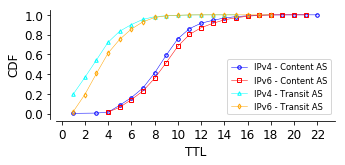

In [20]:
# both types in one plot
ttl_cdf_fig, ttl_cdf_ax = plt.subplots(figsize = (5, 2))

# properties for plotting
props = [['o', 'blue', 's', 'red'],
         ['^', 'cyan', 'd', 'orange']]

cdfs = []

# PLOTTING
for i in range(len(classes)):
    
    (as_type, as_df_v6, as_df_v4) = classes[i]
    
    v4_cdf = Cdf.MakeCdfFromList(as_df_v4['ttl'])
    v6_cdf = Cdf.MakeCdfFromList(as_df_v6['ttl'])
    
    ttl_cdf_ax.plot(v4_cdf.xs, v4_cdf.ps, label = 'IPv4 - %s AS' % (as_type), marker = props[i][0], linewidth = 0.5, markersize = 3.5, fillstyle = 'none', color = props[i][1])
    ttl_cdf_ax.plot(v6_cdf.xs, v6_cdf.ps, label = 'IPv6 - %s AS' % (as_type), marker = props[i][2], linewidth = 0.5, markersize = 3.5, fillstyle = 'none', color = props[i][3])
    
    # append calculated CDFs for later use
    cdfs.append((as_type, 'IPv4', v4_cdf))
    cdfs.append((as_type, 'IPv6', v6_cdf))

# PLOT FORMATTING
# customize axes and grid appearance
ttl_cdf_ax.set_ylim([-0.05, 1.05])
ttl_cdf_ax.set_xlim([-0.5, 23.5])
ttl_cdf_ax.xaxis.set_ticks(range(0, 24, 2))
ttl_cdf_ax.set_xlabel('TTL')
ttl_cdf_ax.set_ylabel('CDF')

ttl_cdf_ax.legend(loc = 'lower right', fontsize = 'small')

yticks = np.arange(0.0, 1.01, 0.2)
ttl_cdf_ax.set_yticks(yticks)
ttl_cdf_ax.grid(False)
ttl_cdf_ax.spines['right'].set_color('none')
ttl_cdf_ax.spines['top'].set_color('none')
ttl_cdf_ax.yaxis.set_ticks_position('left')
ttl_cdf_ax.xaxis.set_ticks_position('bottom')
ttl_cdf_ax.spines['bottom'].set_position(('axes', -0.02))
ttl_cdf_ax.spines['left'].set_position(('axes', -0.02))

# saving and showing plot
ttl_cdf_fig.savefig('plots/ttl_by_as_types_cdf.pdf', bbox_inches = 'tight')

plt.show()

In [21]:
for name, version, cdf in cdfs:
    
    print('--- %s ---' % name)
    print('<<< %s >>>' % version)
    print('value; cdf')
    print('')
    
    for x, y in zip(cdf.xs, cdf.ps):
        print('%.2f; %.5f' % (x, y))
        
    print('\n')

--- Content ---
<<< IPv4 >>>
value; cdf

1.00; 0.00374
3.00; 0.00623
4.00; 0.01455
5.00; 0.08555
6.00; 0.16248
7.00; 0.26048
8.00; 0.41168
9.00; 0.59182
10.00; 0.75783
11.00; 0.86063
12.00; 0.91532
13.00; 0.94439
14.00; 0.96808
15.00; 0.98220
16.00; 0.99050
17.00; 0.99710
18.00; 0.99883
19.00; 0.99955
20.00; 0.99978
21.00; 0.99999
22.00; 1.00000


--- Content ---
<<< IPv6 >>>
value; cdf

4.00; 0.01593
5.00; 0.06500
6.00; 0.14222
7.00; 0.22957
8.00; 0.35790
9.00; 0.51615
10.00; 0.68213
11.00; 0.80118
12.00; 0.86971
13.00; 0.91365
14.00; 0.94974
15.00; 0.97108
16.00; 0.98554
17.00; 0.99529
18.00; 0.99955
19.00; 0.99997
20.00; 1.00000
21.00; 1.00000


--- Transit ---
<<< IPv4 >>>
value; cdf

1.00; 0.19729
2.00; 0.36654
3.00; 0.54394
4.00; 0.72291
5.00; 0.83431
6.00; 0.90168
7.00; 0.95412
8.00; 0.98145
9.00; 0.99080
10.00; 0.99516
11.00; 0.99871
12.00; 0.99960
13.00; 0.99999
14.00; 1.00000
15.00; 1.00000


--- Transit ---
<<< IPv6 >>>
value; cdf

1.00; 0.02094
2.00; 0.19386
3.00; 0.40687
4

# Splitting the dataset
Given the CDF, it looks like TTL = 7 is mainly splitting the AS types:
- Content (i.e. CDN ASes, origin hosts): roughly 80% have TTL >= 7
- Transit/Access: roughly 90% have TTL <= 7

Resulting plot:

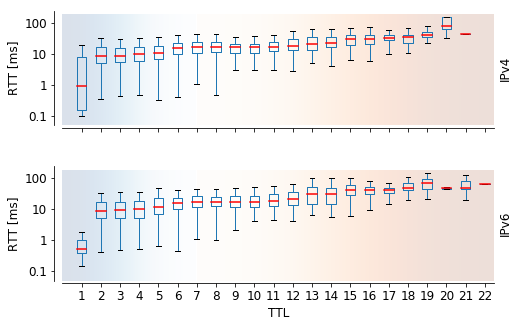

In [22]:
from matplotlib.pyplot import cm 

# helper values for plotting
x_split = 7
xlim_right = 22.5

fig, (ax_v4, ax_v6) = plt.subplots(figsize = (7.5, 5), nrows = 2, ncols = 1, sharey = True)
bp_v4 = res_df_v4.boxplot(column = ['rtt'], by = ['ttl'], ax = ax_v4, sym = "", medianprops = { 'linewidth' : 1.5 }, return_type = 'dict')
bp_v6 = res_df_v6.boxplot(column = ['rtt'], by = ['ttl'], ax = ax_v6, sym = "", medianprops = { 'linewidth' : 1.5 }, return_type = 'dict')

plt.subplots_adjust(hspace = 0.35)

# workaround for changing color of median line
for key in bp_v4.keys():
    for item in bp_v4[key]['medians']:
        item.set_color('red')
for key in bp_v6.keys():
    for item in bp_v6[key]['medians']:
        item.set_color('red')

        
# PLOT FORMATTING
# customize axes and grid appearance
for ax in (ax_v6, ax_v4):
    ax.set_xlim([0, xlim_right])
    ax.set_ylim([0.05, 250])
    ax.xaxis.grid(False)
    ax.set_yscale('log')
    ax.minorticks_off()

ax_v6.set_ylabel('RTT [ms]')
ax_v4.set_ylabel('RTT [ms]')

ax_v4.set_title('')
ax_v6.set_title('')
ax_v4.set_xlabel('')
ax_v6.set_xlabel('')

xticks = range(1, 23, 1)

ax_v4.set_xticks(xticks)
ax_v4.set_xticklabels([])
ax_v6.set_xticks(xticks)
ax_v6.set_xticklabels(xticks)
    
ax_v4.grid(False)
ax_v4.spines['right'].set_color('none')
ax_v4.spines['top'].set_color('none')
ax_v4.yaxis.set_ticks_position('left')
ax_v4.xaxis.set_ticks_position('bottom')
ax_v4.spines['bottom'].set_position(('axes', -0.02))
ax_v4.spines['left'].set_position(('axes', -0.02))
ax_v4.minorticks_off()

ax1_ = ax_v4.twinx()
ax1_.spines['right'].set_color('none')
ax1_.spines['top'].set_color('none')
ax1_.spines['left'].set_color('none')
ax1_.spines['bottom'].set_color('none')
ax1_.yaxis.set_ticks_position('none')
ax1_.set_ylabel('IPv4')
plt.setp(ax1_.get_yticklabels(), visible = False)

ax_v6.grid(False)
ax_v6.spines['right'].set_color('none')
ax_v6.spines['top'].set_color('none')
ax_v6.yaxis.set_ticks_position('left')
ax_v6.xaxis.set_ticks_position('bottom')
ax_v6.spines['bottom'].set_position(('axes', -0.02))
ax_v6.spines['left'].set_position(('axes', -0.02))
ax_v6.minorticks_off()

ax_v6.set_xlabel('TTL')

ax2_ = ax_v6.twinx()
ax2_.spines['right'].set_color('none')
ax2_.spines['top'].set_color('none')
ax2_.spines['left'].set_color('none')
ax2_.spines['bottom'].set_color('none')
ax2_.yaxis.set_ticks_position('none')
ax2_.set_ylabel('IPv6')
plt.setp(ax2_.get_yticklabels(), visible = False)

from matplotlib.ticker import ScalarFormatter
ax_v4.yaxis.set_major_formatter(ScalarFormatter())
ax_v6.yaxis.set_major_formatter(ScalarFormatter())

ax_v4.set_yticklabels([0, 0, 0.1, 1, 10, 100])
ax_v6.set_yticklabels([0, 0, 0.1, 1, 10, 100])


# add gradient background for indication
ax_v4.imshow([[1.0, 0.0], [1.0, 0.0]], interpolation = 'bicubic', cmap = cm.Blues, aspect = 'auto', extent = (0, x_split, 0, 200), alpha = 0.15)
ax_v4.imshow([[0.0, 1.0], [0.0, 1.0]], interpolation = 'bicubic', cmap = cm.Oranges, aspect = 'auto', extent = (x_split, xlim_right, 0, 200), alpha = 0.15)

ax_v6.imshow([[1.0, 0.0], [1.0, 0.0]], interpolation = 'bicubic', cmap = cm.Blues, aspect = 'auto', extent = (0, x_split, 0, 200), alpha = 0.15)
ax_v6.imshow([[0.0, 1.0], [0.0, 1.0]], interpolation = 'bicubic', cmap = cm.Oranges, aspect = 'auto', extent = (x_split, xlim_right, 0, 200), alpha = 0.15)


# saving and showing plot
fig.suptitle('')
fig.savefig('plots/ttl_by_rtt_v4vsv6_gradient_residential.pdf', bbox_inches = 'tight')
plt.show()